In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
#import logging
#import datetime
#import glob
#from photutils.centroids import centroid_sources, centroid_com
#from scipy.optimize import curve_fit
import pandas as pd

In [2]:
stem = '/Users/bandari/Documents/git.repos/dirac/notebooks/'

df = pd.read_csv(stem + 'test_output.csv')

# FWHM of TBS is 6 pixels (5.2 micron each in that setup), and camera magnifies the spot projector input by the factor of 2
# or 6 pixels * 5.2 um/pix * 2 = 62.4 um
# CORRECTION: a best fit to the TBS PSF finds a FWHM of about 4.3

# In DIRAC itself, the pixel pitch is 18 um.

In [3]:
# Make a numpy array that reproduces the TBS PSF, based on the screenshot shared by RZ via email, 12 Apr. 2024

psf_tbs = np.array([[4, 4,  4,  4,  4],
                    [5, 8,  16, 19, 16],
                    [16,43, 79, 80, 52],
                    [50, 129, 186, 175, 115],
                    [103, 212, 236, 226, 180],
                    [132, 236, 233, 216, 195],
                    [95, 198, 230, 216, 159],
                    [38, 93, 151, 148, 94],
                    [12, 25, 47, 48, 31],
                    [5, 5, 8, 7, 6],
                    [3, 3, 4, 3, 3]]) 

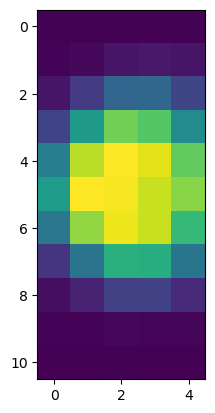

In [6]:
plt.imshow(psf_tbs)
plt.show()

In [5]:
df

,spot number,fwhm_x_pix,fwhm_y_pix,x_pos_pix,y_pos_pix,fwhm_tbs_um,fwhm_x_um,fwhm_y_um
0,0.0,3.233162,2.767319,967.767200,89.914630,44.761667,58.196908,49.811749
1,1.0,3.126663,2.782082,742.533702,91.826000,44.761667,56.279934,50.077476
2,2.0,3.017860,2.745804,522.066152,93.428040,44.761667,54.321485,49.424466
3,3.0,2.722971,3.047146,302.074974,94.534390,44.761667,49.013470,54.848628
4,4.0,3.077028,2.748602,81.536813,95.469124,44.761667,55.386509,49.474837
5,5.0,3.215425,2.772997,964.139559,297.156511,44.761667,57.877644,49.913954
6,6.0,3.168267,2.776261,743.747453,298.964619,44.761667,57.028808,49.972695
7,7.0,3.076096,2.738436,523.685135,300.373469,44.761667,55.369721,49.291854
8,8.0,3.196981,2.770661,303.826657,301.653051,44.761667,57.545658,49.871901
9,9.0,3.120583,2.743918,83.440631,302.676017,44.761667,56.170498,49.390525


In [4]:
# FWHM_net ** 2 = FWHM_instrum ** 2 + FWHM_PSF ** 2, so 

FWHM_PSF = np. sqrt( FWHM_net ** 2 - FWHM_instrum ** 2 )

NameError: name 'FWHM_net' is not defined

In [16]:
df.keys()

Index(['spot number', 'fwhm_x_pix', 'fwhm_y_pix', 'x_pos_pix', 'y_pos_pix',
       'fwhm_tbs_um', 'fwhm_x_um', 'fwhm_y_um', 'fwhm_avg_um'],
      dtype='object')

In [5]:
df['fwhm_avg_um'] = 0.5 * (df['fwhm_x_um'] + df['fwhm_y_um'])
df['fwhm_avg_pix'] = 0.5 * (df['fwhm_x_pix'] + df['fwhm_y_pix'])

In [6]:
df['fwhm_avg_um']

0     54.004329
1     53.178705
2     51.872975
3     51.931049
4     52.430673
5     53.895799
6     53.500751
7     52.330788
8     53.708780
9     52.780512
10    53.854661
11    54.025826
12    52.620187
13    53.475812
14    52.845744
15    54.847736
16    53.738133
17    52.418402
18    53.427404
19    53.182013
20    54.946936
21    53.397634
22    51.717491
23    52.172702
24    52.444434
Name: fwhm_avg_um, dtype: float64

In [18]:
df['fwhm_avg_pix']

0     3.000240
1     2.954372
2     2.881832
3     2.885058
4     2.912815
5     2.994211
6     2.972264
7     2.907266
8     2.983821
9     2.932251
10    2.991926
11    3.001435
12    2.923344
13    2.970878
14    2.935875
15    3.047096
16    2.985452
17    2.912133
18    2.968189
19    2.954556
20    3.052608
21    2.966535
22    2.873194
23    2.898483
24    2.913580
Name: fwhm_avg_pix, dtype: float64

In [12]:
# all in units of um

# the true, diffraction-limited PSF after removal of TBS and camera magnification
df['fwhm_true_um'] = np. sqrt( df['fwhm_avg_um'] ** 2 - df['fwhm_tbs_um'] ** 2 )
df['strehl_approx'] = np.power( 30.40 / df['fwhm_true_um'], 2)

In [13]:
df['strehl_approx']

0     1.012378
1     1.121053
2     1.344822
3     1.333128
4     1.239870
5     1.025534
6     1.076202
7     1.257524
8     1.048959
9     1.181525
10    1.030603
11    1.009809
12    1.207615
13    1.079556
14    1.171208
15    0.919867
16    1.045217
17    1.242014
18    1.086122
19    1.120575
20    0.910001
21    1.090196
22    1.377099
23    1.286443
24    1.237474
Name: strehl_approx, dtype: float64

In [7]:
# what perfect PSF would we expect?

# Airy diameter: r_Airy = 1.22 * (lambda/D) * F = 1.22 * lambda * F#
# where F# = 29 for DIRAC. For Y-band, this would be
# r_Airy = 1.22 * 1.02 um * 29 = 36.09 um = 36.09 um / (18 um/pix ) = 2.00 pixels

# FWHM of an Airy function is approximately
# FWHM_Airy = 1.028 * lambda/D 
# or r_Airy/FWHM_Airy = 1.187

# Then, we expect FWHM_Airy = r_Airy / 1.187 = 30.40 um = 1.68 pixels

lambda_Y_um = 1.02

0     37.192382
1     34.114866
2     30.776889
3     19.967809
4     32.619909
5     36.690801
6     35.336640
7     32.591397
8     36.164844
9     33.934024
10    37.023261
11    36.150058
12    32.704301
13    35.656349
14    20.737619
15    38.618062
16    22.639103
17    32.522927
18    21.902120
19    35.079502
20    22.662858
21    23.598626
22    21.564479
23    31.658303
24    32.516065
dtype: float64

In [9]:
# approximate Strehls

strehl = np.power( 30.40 / fwhm_true_um, 2)

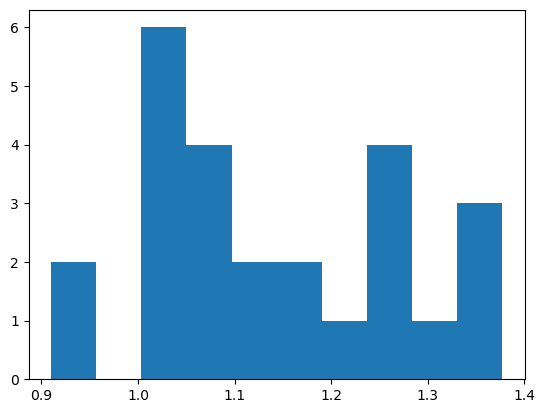

In [11]:
plt.hist(strehl)
plt.show()

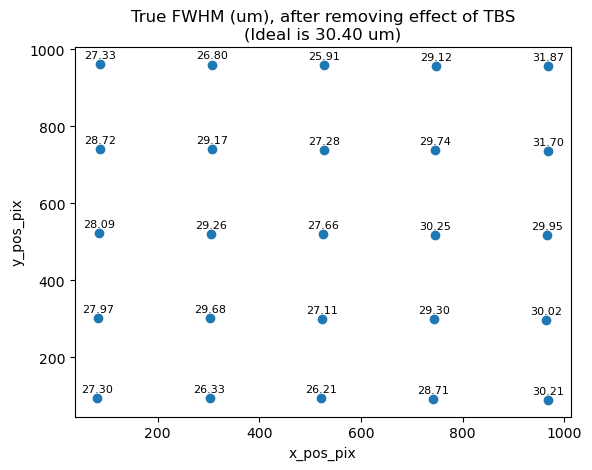

In [22]:
# make a scatter plot of df['x_pos_pix'] and df['y_pos_pix'], where each point is labeled on the plot with the string df['fwhm_true_um'], with a small offset from the marker
plt.scatter(df['x_pos_pix'], df['y_pos_pix'])
for i, row in df.iterrows():
    plt.text(row['x_pos_pix'], row['y_pos_pix'] + 10, f"{row['fwhm_true_um']:.2f}", ha='center', va='bottom', fontsize=8)
plt.title('True FWHM (um), after removing effect of TBS\n(Ideal is 30.40 um)' )
plt.xlabel('x_pos_pix')
plt.ylabel('y_pos_pix')
plt.savefig('fwhm_plot_um.png')


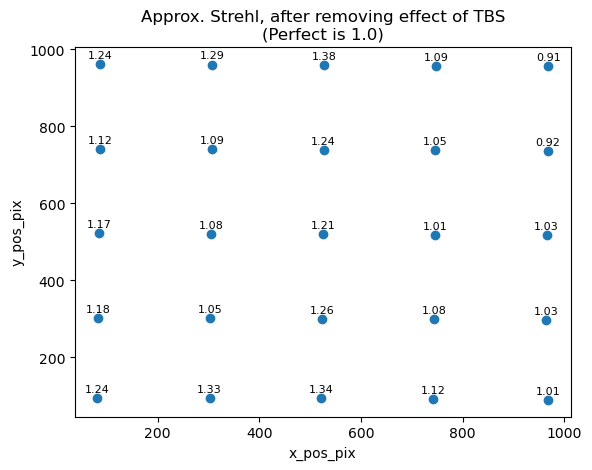

In [26]:
# make a scatter plot of df['x_pos_pix'] and df['y_pos_pix'], where each point is labeled on the plot with the string df['fwhm_true_um'], with a small offset from the marker
plt.scatter(df['x_pos_pix'], df['y_pos_pix'])
for i, row in df.iterrows():
    plt.text(row['x_pos_pix'], row['y_pos_pix'] + 10, f"{row['strehl_approx']:.2f}", ha='center', va='bottom', fontsize=8)
plt.title('Approx. Strehl, after removing effect of TBS\n(Perfect is 1.0)' )
plt.xlabel('x_pos_pix')
plt.ylabel('y_pos_pix')
#plt.show()
plt.savefig('fwhm_plot_strehl.png')